In [ ]:
# First, let's call your complaint_abundance.py script to get the most abundant complaint
import subprocess
import re

print("=== Getting most abundant complaint type using your script ===")
most_abundant_type = None

try:
    result = subprocess.run([
        'python3', 
        '../scripts/complaint_abundance.py', 
        '-i', '../data/first_two_months.csv'
    ], capture_output=True, text=True, cwd='.')
    
    print("Script output:")
    print(result.stdout)
    if result.stderr:
        print("Errors:")
        print(result.stderr)
    
    # Extract the most abundant complaint type from the output
    if result.stdout:
        match = re.search(r'Most abundant complaint type: (.+)', result.stdout)
        if match:
            most_abundant_type = match.group(1).strip()
            print(f"\nExtracted most abundant type: {most_abundant_type}")
        
except Exception as e:
    print(f"Error running script: {e}")

print("\n" + "="*50)


=== Getting most abundant complaint type using your script ===


Script output:
Most abundant complaint type: HEAT/HOT WATER
Count: 81641

Top 5 complaint types:
Complaint Type
HEAT/HOT WATER          81641
Illegal Parking         79916
Noise - Residential     43602
Blocked Driveway        28608
UNSANITARY CONDITION    19208
Name: Count, dtype: int64




Most abundant complaint type: HEAT/HOT WATER
Total count: 81641

Columns in the data: ['Complaint Type', 'Borough', 'Count']

First few rows of most abundant complaint data:
     Complaint Type        Borough  Count
1    HEAT/HOT WATER       BROOKLYN  20915
6    HEAT/HOT WATER          BRONX  30139
9    HEAT/HOT WATER      MANHATTAN  17604
24   HEAT/HOT WATER         QUEENS  12117
145  HEAT/HOT WATER  STATEN ISLAND    866
No date column found. Creating bar chart by borough instead:


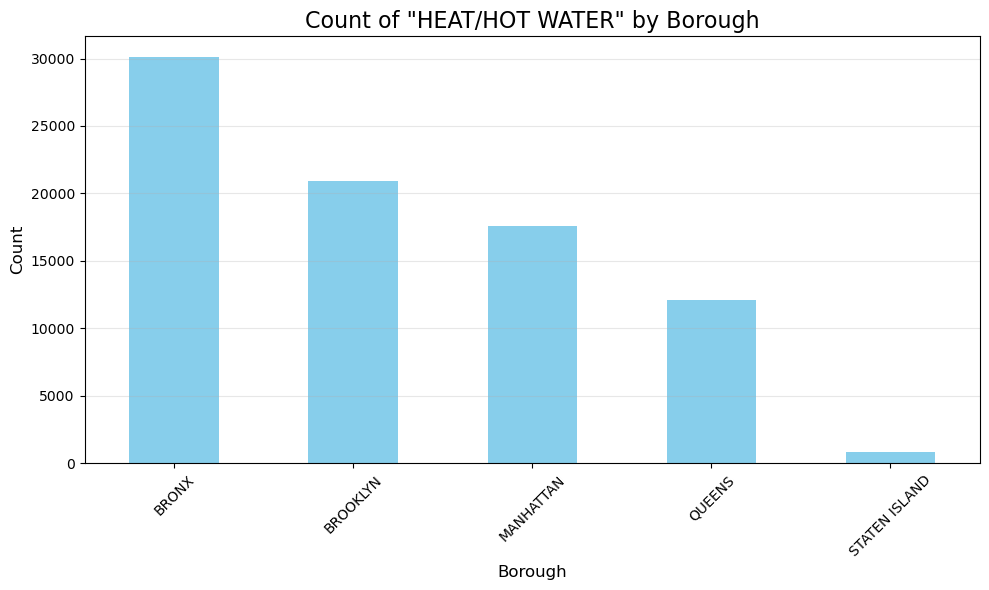

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the data
df = pd.read_csv('../data/first_two_months.csv')

# Use the most abundant complaint type from the first cell
if 'most_abundant_type' in globals() and most_abundant_type:
    print(f"Using most abundant complaint type from first cell: {most_abundant_type}")
else:
    # Fallback: compute it if not available from first cell
    complaint_type_counts = df.groupby('Complaint Type')['Count'].sum().sort_values(ascending=False)
    most_abundant_type = complaint_type_counts.index[0]
    print(f"Computed most abundant complaint type: {most_abundant_type}")

# Get total count for this complaint type
complaint_type_counts = df.groupby('Complaint Type')['Count'].sum().sort_values(ascending=False)
total_count = complaint_type_counts[most_abundant_type]
print(f"Total count: {total_count}")

# Filter data for only the most abundant complaint type
most_abundant_data = df[df['Complaint Type'] == most_abundant_type].copy()

# Check if we have date information in the data
print(f"\nColumns in the data: {list(df.columns)}")
print(f"\nFirst few rows of most abundant complaint data:")
print(most_abundant_data.head())

# If there's a date column, we'll use it. Otherwise, we'll create a time series
# Let's check what columns we have and see if there's date information
if 'Date' in df.columns or 'date' in df.columns or 'Created Date' in df.columns:
    # Use the existing date column
    date_col = [col for col in df.columns if 'date' in col.lower()][0]
    most_abundant_data[date_col] = pd.to_datetime(most_abundant_data[date_col])
    most_abundant_data = most_abundant_data.sort_values(date_col)
    
    # Group by date and sum counts
    daily_counts = most_abundant_data.groupby(date_col)['Count'].sum().reset_index()
    
    # Create the time series plot
    plt.figure(figsize=(14, 6))
    plt.plot(daily_counts[date_col], daily_counts['Count'], marker='o', linewidth=2, markersize=4)
    plt.title(f'Daily Count of "{most_abundant_type}" Complaints Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
else:
    # If no date column, create a simple bar chart by borough
    print("No date column found. Creating bar chart by borough instead:")
    borough_counts = most_abundant_data.groupby('Borough')['Count'].sum().sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    borough_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Count of "{most_abundant_type}" by Borough', fontsize=16)
    plt.xlabel('Borough', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
